In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import os

In [3]:
os.listdir('/Users/christophereppig/datasets')

['divvy_rides.csv', 'salary.csv']

In [4]:
divvy = pd.read_csv('/Users/christophereppig/datasets/divvy_rides.csv')

/Users/christophereppig/anaconda/lib/python2.7/site-packages/IPython/core/interactiveshell.py:2723: DtypeWarning: Columns (5) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [6]:
divvy.head()

,bikeid,birthday,birthyear,from_station_id,from_station_name,gender,starttime,stoptime,to_station_id,to_station_name,trip_id,tripduration,usertype
0,480,NaN,NaN,85,Michigan Ave & Oak St,NaN,2013-06-27 12:11,2013-06-27 12:16,28,Larrabee St & Menomonee St,4118,316,Customer
1,77,NaN,NaN,32,Racine Ave & Congress Pkwy,NaN,2013-06-27 14:44,2013-06-27 14:45,32,Racine Ave & Congress Pkwy,4275,64,Customer
2,77,NaN,NaN,32,Racine Ave & Congress Pkwy,NaN,2013-06-27 14:58,2013-06-27 15:05,19,Loomis St & Taylor St,4291,433,Customer
3,77,NaN,NaN,19,Loomis St & Taylor St,NaN,2013-06-27 15:06,2013-06-27 15:09,19,Loomis St & Taylor St,4316,123,Customer
4,77,NaN,NaN,19,Loomis St & Taylor St,NaN,2013-06-27 15:13,2013-06-27 15:27,55,Halsted St & James M Rochford St,4342,852,Customer


In [9]:
divvy['usertype'].value_counts()

Subscriber    5466758
Customer      2400700
Dependent         143
Name: usertype, dtype: int64

In [11]:
divvy['bikeid'].value_counts().head(25)

872     2820
478     2814
267     2757
94      2745
1329    2739
441     2728
417     2721
686     2714
225     2701
909     2698
1037    2686
721     2685
452     2684
30      2684
650     2677
1381    2675
414     2673
1226    2664
251     2662
571     2658
473     2654
371     2650
359     2649
1283    2645
1975    2645
Name: bikeid, dtype: int64

{'boxes': [<matplotlib.lines.Line2D at 0x116d3a050>],
 'caps': [<matplotlib.lines.Line2D at 0x116d3ae50>,
 'fliers': [<matplotlib.lines.Line2D at 0x116d51190>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x116d46b10>],
 'whiskers': [<matplotlib.lines.Line2D at 0x116d10150>,
  <matplotlib.lines.Line2D at 0x116d3a810>]}

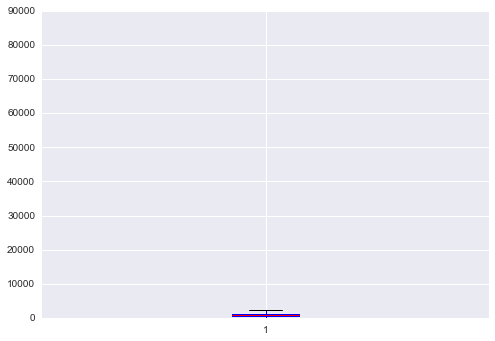

In [31]:
plt.boxplot(divvy['tripduration'])

In [12]:
divvy['from_station_name'].value_counts().head(20)

Streeter Dr & Illinois St       137683
Lake Shore Dr & Monroe St       124674
Clinton St & Washington Blvd    112140
Theater on the Lake             108426
Michigan Ave & Oak St           101762
Millennium Park                 100545
Lake Shore Dr & North Blvd       90112
Canal St & Adams St              88121
Canal St & Madison St            86289
Clinton St & Madison St          71598
Columbus Dr & Randolph St        70126
McClurg Ct & Illinois St         67656
Michigan Ave & Washington St     65991
Canal St & Jackson Blvd          64975
Michigan Ave & Lake St           63442
Dearborn St & Monroe St          61194
Franklin St & Jackson Blvd       60706
Museum Campus                    59772
LaSalle St & Jackson Blvd        58556
Wabash Ave & Grand Ave           58124
Name: from_station_name, dtype: int64

In [13]:
divvy['to_station_name'].value_counts().head(20)

Streeter Dr & Illinois St       164101
Lake Shore Dr & Monroe St       122493
Theater on the Lake             115330
Clinton St & Washington Blvd    110611
Millennium Park                 110085
Michigan Ave & Oak St           109586
Lake Shore Dr & North Blvd      101364
Canal St & Madison St            96899
Canal St & Adams St              85913
McClurg Ct & Illinois St         69345
Michigan Ave & Washington St     66940
Michigan Ave & Lake St           65580
Clinton St & Madison St          63789
Canal St & Jackson Blvd          62719
Museum Campus                    60718
Dearborn St & Monroe St          60350
Wabash Ave & Grand Ave           60333
Clark St & Elm St                57589
LaSalle St & Jackson Blvd        56869
Franklin St & Jackson Blvd       56046
Name: to_station_name, dtype: int64

In [20]:
departure_arrival = pd.DataFrame(divvy['to_station_name'].value_counts()).join(divvy['from_station_name'].value_counts())

In [23]:
departure_arrival['Difference'] = departure_arrival['to_station_name']-departure_arrival['from_station_name']
departure_arrival.head()

,to_station_name,from_station_name,Difference
Streeter Dr & Illinois St,164101,137683.0,26418.0
Lake Shore Dr & Monroe St,122493,124674.0,-2181.0
Theater on the Lake,115330,108426.0,6904.0
Clinton St & Washington Blvd,110611,112140.0,-1529.0
Millennium Park,110085,100545.0,9540.0


In [25]:
departure_arrival['Difference'].sort_values().head()

Columbus Dr & Randolph St      -22403.0
Canal St & Monroe St           -12298.0
Clinton St & Madison St         -7809.0
Stetson Ave & South Water St    -7677.0
Desplaines St & Kinzie St       -5314.0
Name: Difference, dtype: float64

In [29]:
departure_arrival['from_station_name'].describe()
departure_arrival.dropna(inplace=True)

(array([ 387.,  101.,   47.,   22.,   11.,    2.,    3.,    3.,    1.,    2.]),
 array([  1.00000000e+00,   1.37692000e+04,   2.75374000e+04,
          4.13056000e+04,   5.50738000e+04,   6.88420000e+04,
          8.26102000e+04,   9.63784000e+04,   1.10146600e+05,
          1.23914800e+05,   1.37683000e+05]),
 <a list of 10 Patch objects>)

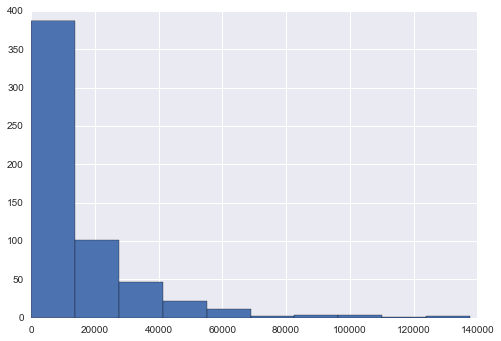

In [30]:
plt.hist(departure_arrival['from_station_name'])

(array([ 156.,   53.,   32.,   26.,   26.,   14.,   22.,   28.,   19.,
          11.,   20.,   12.,    9.,    7.,   14.,    7.,    9.,    9.,
           3.,   11.,    8.,    1.,    6.,   10.,    8.,    3.,    3.,
           4.,    3.,    1.,    2.,    4.,    3.,    2.,    2.,    4.,
           1.,    2.,    0.,    2.,    1.,    1.,    2.,    1.,    2.,
           0.,    1.,    2.,    0.,    1.,    1.,    0.,    1.,    0.,
           0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    1.,
           0.,    1.,    1.,    0.,    0.,    0.,    0.,    0.,    0.,
           0.,    2.,    0.,    0.,    0.,    0.,    1.,    0.,    0.,
           1.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
           1.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    1.]),
 array([  1.00000000e+00,   1.37782000e+03,   2.75464000e+03,
          4.13146000e+03,   5.50828000e+03,   6.88510000e+03,
          8.26192000e+03,   9.63874000e+03,   1.10155600e+04,
          1.23923800e+04

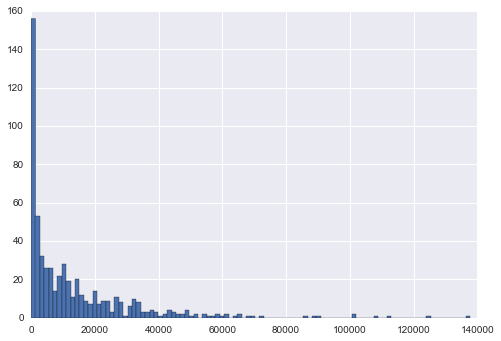

In [32]:
plt.hist(departure_arrival['from_station_name'], bins=100)

In [33]:
departure_arrival.sort_values(by='from_station_name').head()

,to_station_name,from_station_name,Difference
Central St Metra,1,1.0,0.0
Ashland Ave & 69th St,3,1.0,2.0
Throop St & 52nd St,1,1.0,0.0
Racine Ave & Garfield Blvd,1,1.0,0.0
State St & 76th St,1,1.0,0.0


In [34]:
departure_arrival.sort_values(by='to_station_name').head()

,to_station_name,from_station_name,Difference
Central St Metra,1,1.0,0.0
Throop St & 52nd St,1,1.0,0.0
Racine Ave & Garfield Blvd,1,1.0,0.0
State St & 76th St,1,1.0,0.0
Lombard Ave & Madison St,1,2.0,-1.0


(array([   1.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
           0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
           0.,    0.,    1.,    0.,    0.,    0.,    0.,    0.,    0.,
           0.,    0.,    1.,    1.,    0.,    0.,    0.,    0.,    1.,
           3.,    2.,    3.,    1.,    6.,   12.,   10.,   14.,   52.,
         253.,  135.,   29.,   24.,    7.,    8.,    3.,    1.,    1.,
           2.,    1.,    0.,    1.,    0.,    0.,    1.,    1.,    0.,
           0.,    0.,    1.,    0.,    1.,    1.,    0.,    0.,    0.,
           0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
           0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
           0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    1.]),
 array([-22403.  , -21914.79, -21426.58, -20938.37, -20450.16, -19961.95,
        -19473.74, -18985.53, -18497.32, -18009.11, -17520.9 , -17032.69,
        -16544.48, -16056.27, -15568.06, -15079.85, -14591.64,

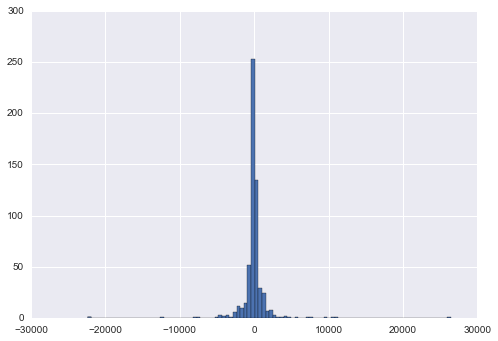

In [35]:
plt.hist(departure_arrival['Difference'], bins=100)

In [36]:
departure_arrival['Difference'].describe()

count      579.000000
mean         0.005181
std       2086.448033
min     -22403.000000
25%       -225.500000
50%          0.000000
75%        217.500000
max      26418.000000
Name: Difference, dtype: float64